In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # imports seaborn class as an alias 'sns'; 
from sklearn.decomposition import PCA # imports the PCA class, allowing us to reduce the dimensionality of our data
from sklearn.preprocessing import RobustScaler

In [2]:
train = pd.read_csv('./data/train_timeseries/train_timeseries.csv')
test = pd.read_csv('./data/test_timeseries/test_timeseries.csv')
val = pd.read_csv('./data/validation_timeseries/validation_timeseries.csv')

In [3]:
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [4]:
# help(train.drop)

In [5]:
# train = train.drop(['T2M_MAX','T2M_MIN','WS10M','WS10M_MAX','WS10M_MIN','WS50M','WS50M_MAX','WS50M_MIN'],axis=1)

In [9]:
train = train[train['fips'] < 1500]
test = test[test['fips'] < 1500]
val = val[val['fips'] < 1500]


In [8]:
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [14]:
# Formatting scores into own dataframes
train_y = train['score'] + 1
train_y.fillna(0,inplace=True)

test_y = test['score'] + 1
test_y.fillna(0,inplace=True)

val_y = val['score'] + 1
val_y.fillna(0,inplace=True)

print('The output shapes are',train_y.shape,test_y.shape,val_y.shape)
# print(train1_y.shape)

The output shapes are (416070,) (48977,) (48910,)


In [15]:
# Extracting features from entire dataframe
# train_x = train.loc[:,'PRECTOT':'WS50M_RANGE']
# test_x = test.loc[:,'PRECTOT':'WS50M_RANGE']
# val_x = val.loc[:,'PRECTOT':'WS50M_RANGE']

train_x = train.drop(['date','score'],axis = 1)
test_x = test.drop(['date','score'],axis = 1)
val_x = val.drop(['date','score'],axis = 1)

print('The input shapes are',train_x.shape,test_x.shape,val_x.shape)


The input shapes are (416070, 19) (48977, 19) (48910, 19)


In [17]:
# Normalize the features with train_x and save transform into 'scaler'
scaler = RobustScaler().fit(train_x)

In [18]:
# Apply transformation to each input matrix
train_x_norm = scaler.transform(train_x)
test_x_norm = scaler.transform(test_x)
val_x_norm = scaler.transform(val_x)


In [20]:
train_x_norm.shape

(416070, 19)

In [22]:
train_x_norm

array([[-0.97058824,  0.00285714,  0.25827815, ...,  0.24712644,
         0.54634146, -0.34545455],
       [-0.97058824, -0.00285714,  0.28476821, ...,  0.29885057,
         0.78536585, -0.58787879],
       [-0.97058824,  0.98285714,  0.01986755, ...,  2.24712644,
         1.83414634,  0.16969697],
       ...,
       [ 0.97058824,  0.81142857, -0.36423841, ...,  2.47126437,
         1.75121951,  0.5030303 ],
       [ 0.97058824, -0.06      , -0.1192053 , ...,  1.07471264,
         0.30243902,  0.83030303],
       [ 0.97058824,  2.82571429, -0.59602649, ...,  1.06321839,
         0.84878049,  0.13939394]])

In [23]:
pca = PCA(n_components=2)

In [24]:
train_x_pca = pca.fit_transform(train_x_norm)
test_x_pca = pca.fit_transform(test_x_norm)
val_x_pca = pca.fit_transform(val_x_norm)

In [26]:
print(train_x_pca.shape,test_x_pca.shape,val_x_pca.shape)

(416070, 2) (48977, 2) (48910, 2)


# Plotting matrices with Seaborn

In [19]:
# help(np.insert)

Help on function insert in module numpy:

insert(arr, obj, values, axis=None)
    Insert values along the given axis before the given indices.
    
    Parameters
    ----------
    arr : array_like
        Input array.
    obj : int, slice or sequence of ints
        Object that defines the index or indices before which `values` is
        inserted.
    
        .. versionadded:: 1.8.0
    
        Support for multiple insertions when `obj` is a single scalar or a
        sequence with one element (similar to calling insert multiple
        times).
    values : array_like
        Values to insert into `arr`. If the type of `values` is different
        from that of `arr`, `values` is converted to the type of `arr`.
        `values` should be shaped so that ``arr[...,obj,...] = values``
        is legal.
    axis : int, optional
        Axis along which to insert `values`.  If `axis` is None then `arr`
        is flattened first.
    
    Returns
    -------
    out : ndarray
        A

In [20]:
# x = pd.DataFrame(np.insert(train1_x_pca,2,train1_y,axis=1),columns = ['feat1','feat2','score'])

In [21]:
# x

,feat1,feat2,score
0,-0.645820,-0.717222,0.0000
1,-0.381169,-0.982052,0.0000
2,2.360666,-2.851328,0.0000
3,5.161351,-2.418325,2.0000
4,-1.432511,-1.301068,0.0000
...,...,...,...
416065,0.492674,-0.369118,4.0023
416066,0.546968,-1.504876,0.0000
416067,2.422237,-4.655284,0.0000
416068,-0.148301,-3.043742,0.0000


<AxesSubplot:xlabel='feat1', ylabel='feat2'>

C:\Users\brenn\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


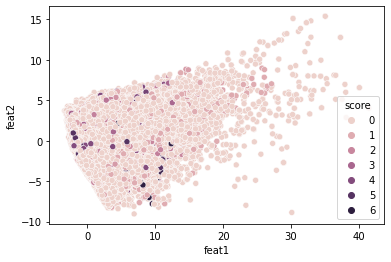

In [22]:
# sns.scatterplot(data=x, x='feat1', y='feat2', hue='score')

# Training and Predicting w/ SGD Regressor

In [27]:
# Import SGD Regressor model
from sklearn.linear_model import SGDRegressor # imports SGDRegressor class

In [28]:
sgdr = SGDRegressor()

In [ ]:
# train_x_pca = pca.fit_transform(train_x_norm)
# test_x_pca = pca.fit_transform(test_x_norm)
# val_x_pca = pca.fit_transform(val_x_norm)

In [29]:
sgdr.fit(train_x_pca,train_y)

SGDRegressor()

In [32]:
y_pred = sgdr.predict(test_x_pca)

In [35]:
y_pred

array([0.30390641, 0.31216479, 0.28812983, ..., 0.25885096, 0.2355403 ,
       0.26896579])

In [37]:
sgdr.score(test_x_pca,test_y)

-0.03748313558940408